In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c, h, k
from scipy.optimize import curve_fit
from scipy.integrate import quad
from sklearn.metrics import r2_score
homefolder = os.path.dirname(os.path.dirname(os.getcwd()))

In [2]:
wl0 = 0.5 * 10 ** (-6)
wl1 = 0.9 * 10 ** (-6)
param1 = h * 2 * c ** 2
param2 = h * c / k
wl = np.array([0.548, 0.586, 0.628, 0.667, 0.704, 0.743, 0.786, 0.82])*10**(-6)
WL = ["0.548","0.585","0.625","0.663","0.706","0.744","0.785","0.824"]
T_array = np.array([700, 750, 800, 850, 900, 900, 950, 950, 950, 1000, 1000, 1050, 1075, 1085]) + 273.15
camera_folder = homefolder+"/13_Databank/"
DF_F = pd.read_excel(camera_folder+"CMS22010236.xlsx",'Filter')
DF_QE0 = pd.read_excel(camera_folder+"CMS22010236.xlsx",'QE')
DF_T = pd.read_excel(camera_folder+"FIFO-Lens_tr.xlsx")
DF_QE = pd.read_excel(camera_folder+"qe_cor.xlsx")
Anti_CT = np.array(pd.read_excel(camera_folder+"CT_cor.xlsx"))

In [74]:
def GT(temp,wavelength):
    result_value = param1/(wavelength**5)/(np.exp(param2/(wavelength*temp))-1)
    return result_value
def cali_curvefit(a,b,DV):
    return a*DV+b
def cali_curvefit2(a,DV):
    return a*DV

In [57]:
DF_mean = pd.read_csv(homefolder + "/11_MusTAM_Analyse\Result_calibration/mean_value_15.csv")
integra_factor = np.asarray(DF_mean.integre_factor)
temp = np.asarray(DF_mean.temp)
noise = np.asarray(DF_mean.noise)
fac_a_o = []
fac_b_o = []
DV_matrix_o = []
for j in range(len(WL)):
    DV_array_o = []
    PV_array_o = []
    for i in range(len(temp)):
        DV = DF_mean[DF_mean.noise==noise[i]]
        DV_mean = np.array((np.asarray(DV[WL[j]])-noise[i])/integra_factor[i])[0]
        DV_array_o.append(DV_mean)
        PV_array_o.append(GT(temp[i],wl[j]))
    DV_array_o = np.array(DV_array_o)
    PV_array_o = np.array(PV_array_o)
    popt,cov = curve_fit(cali_curvefit,DV_array_o,PV_array_o)
    fac_a_o.append(popt[1])
    fac_b_o.append(popt[0])
    DV_matrix_o.append(DV_array_o)
print(fac_a_o)
print(fac_b_o)
DV_matrix_o = np.array(DV_matrix_o)

[1756.746340466111, 4620.37681732433, 9554.599796821254, 18700.300953238424, 28473.225963567078, 42827.616845539575, 61765.23630284166, 84336.16850377414]
[-624709.0730704351, -1254566.579938359, -2277504.575979584, -2890268.288779555, -3502079.0455933176, -2634842.052234063, -479234.01742252824, 4443257.578442007]


In [49]:
# fac_a_o = [1756.938468705305, 4620.35850520328, 9552.7283697337, 18697.651981724794, 28449.45029295659, 42834.12281199195, 61743.46012858457, 93034.80373905237]
# fac_b_o = [-625349.0077182171, -1254498.552607664, -2270294.039189352, -2879859.998244134, -3394908.9167206157, -2799286.3354184492, -354322.97312840755, -46838651.38351578]

In [62]:
fac_a_o = [1002.797069,2958.991884,6839.382626,14880.49427,24271.89704,39436.81028,59739.55742,91042.59694]
fac_b_o = [-32089.5062,-88769.75653,-204592.6101,-322492.8039,-455474.4616,-487813.1406,-447094.1569,166585.3543]

In [40]:
print(np.shape(DV_matrix_o))

(8, 14)


In [70]:
WL2 = ["0.548","0.585","0.625","0.663","0.706","0.744","0.785","0.824","1000"]
DF_QE2 = pd.read_excel(camera_folder+"qe_cor.xlsx")
CT_cor = np.transpose(np.array(pd.read_excel(camera_folder+"CT_cor.xlsx")))
DF_mean = pd.read_csv(homefolder + "/11_MusTAM_Analyse\Result_calibration/mean_value_15.csv")
integra_factor = np.asarray(DF_mean.integre_factor)
temp = np.asarray(DF_mean.temp)
noise = np.asarray(DF_mean.noise)
fac_a = []
fac_b = []
PV_matrx = []
for j in range(len(wl)):
    DV_array = []
    PV_array = []
    for i in range(len(temp)):
        DV = DF_mean[DF_mean.noise==noise[i]]
        DV_mean = []
        for k in WL2:
            DV_mean.append(np.array((np.asarray(DV[k])-noise[i])/integra_factor[i])[0])
        DV_mean = CT_cor @ np.array(DV_mean)
        DV_array.append(DV_mean)
        PV_array.append(GT(temp[i],wl[j]))
    DV_array = np.array(DV_array)
    PV_array = np.array(PV_array)
    PV_matrx.append(PV_array)
    popt,cov = curve_fit(cali_curvefit,DV_array[:,j],PV_array)
    fac_a.append(popt[1])
    fac_b.append(popt[0])
PV_matrx = np.array(PV_matrx)

print(fac_a)
print(fac_b)

[13733.750343380801, 32845.416999239525, 63815.46454010949, 112151.64245303175, 115941.99102295467, 127734.80790870922, 176249.7120461079, 156641.0745278495]
[-260259.8758246685, -253994.60871545956, 438084.10432568006, 231020.30555459575, 382088.4060766045, 1215472.8622081615, 4687796.444981415, 2330629.6728531504]


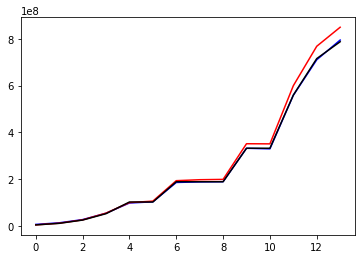

In [71]:
for i in range(8):
    plt.clf()
    plt.plot(DV_array[:,i]*fac_a[i]+fac_b[i],color="b")
    plt.plot(DV_matrix_o[i,:]*fac_a_o[i]+fac_b_o[i],color="r")
    plt.plot(PV_matrx[i,:],color="k")
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/cali_T-wise_ch"+str(i+1)+".png", dpi=800,bbox_inches='tight')

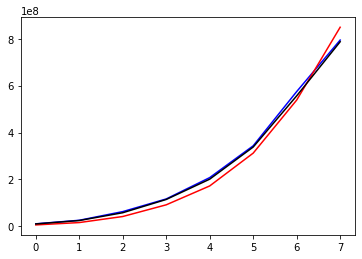

In [72]:
for i in range(len(DV_array)):
    plt.clf()
    plt.plot(DV_array[i,:]*fac_a+fac_b,color="b")
    plt.plot(DV_matrix_o[:,i]*fac_a_o+fac_b_o,color="r")
    plt.plot(PV_matrx[:,i],color="k")
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/cali_ch-wise_T"+str(temp[i])+"_case"+str(i+1)+".png", dpi=800,bbox_inches='tight')


In [45]:
for i in range(len(temp)):
    plt.clf()
    plt.plot(DV_array[:,i]*fac_a+fac_b,"--",color="b")
    plt.plot(DV_matrix_o[i,:]*fac_a_o+fac_b_o,"--",color="r")
    plt.plot(PV_matrx[:,i],color="k")
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/High-PV_compare"+str(temp[i])+"_"+str(i+1)+".png", dpi=800,bbox_inches='tight')

ValueError: operands could not be broadcast together with shapes (14,) (8,) 

<Figure size 432x288 with 0 Axes>

In [8]:
def lin_int(x,x0,x1,y0,y1):
    y = y0+(y1-y0)*(x-x0)/(x1-x0)
    return y

def GT(temp,wavelength):
    result_value = param1/(wavelength**5)/(np.exp(param2/(wavelength*temp))-1)
    return result_value


def integr(wl,f_array,qe_array,t):
    f_i = len(f_array[0,f_array[0,:]*10**(-9)<=wl])
    qe_i = len(qe_array[0,qe_array[0,:]*10**(-9)<=wl])
    f = lin_int(wl*10**9,f_array[0,f_i-1],f_array[0,f_i],f_array[1,f_i-1],f_array[1,f_i])
    qe = lin_int(wl*10**9,qe_array[0,qe_i-1],qe_array[0,qe_i],qe_array[1,qe_i-1],qe_array[1,qe_i])
    result = f*qe*GT(t,wl)*100
    return result

def funct_int(qe,t):
    funct0 = quad(integr, wl0, wl1, args=(tr_array, qe, t))[0]
    return funct0

In [14]:
inte_sens = np.array([0.04706984, 0.04876983, 0.05158658, 0.05285746, 0.05138346, 0.05094696,
 0.04993592, 0.04941019, 0.05243453])
DF_F = pd.read_excel(camera_folder + "CMS22010236.xlsx", 'Filter')
DF_QE = pd.read_excel(camera_folder + "CMS22010236.xlsx", 'QE')
DF_T = pd.read_excel(camera_folder + "FIFO-Lens_tr_backup.xlsx")
qe_array = []
for i in range(9):
    qe_array.append(DF_QE.iloc[:-1, [0, 1 + i]])
qe_array = np.array(qe_array).transpose(0, 2, 1)
tr_array = np.array(DF_T).transpose()
wl0 = 0.5 * 10 ** (-6)
wl1 = 1 * 10 ** (-6)

C:\Users\ge83viz\AppData\Local\Temp\ipykernel_28192\1447442625.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  funct0 = quad(integr, wl0, wl1, args=(tr_array, qe, t))[0]


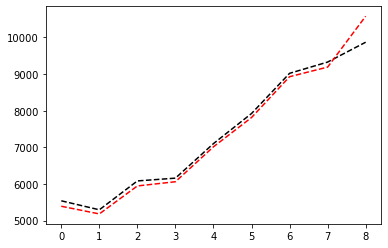

In [30]:
DF_mean = pd.read_csv(homefolder + "/11_MusTAM_Analyse\Result_calibration/mean_value_15.csv")
temp = np.asarray(DF_mean.temp)
noise = np.asarray(DF_mean.noise)
DF_QE_ori = pd.read_excel(camera_folder + "CMS22010236.xlsx", 'QE')
DF_T = pd.read_excel(camera_folder + "FIFO-Lens_tr_backup.xlsx")
qe_array_ori = []
for i in range(9):
    qe_array_ori.append(DF_QE_ori.iloc[:, [0, 1 + i]])
qe_array_ori = np.array(qe_array_ori).transpose(0, 2, 1)
tr_array = np.array(DF_T).transpose()
for i in range(len(temp)):
    plt.clf()
    DV_ori = []
    DV_reconst = []
    DV = DF_mean[DF_mean.noise==noise[i]]
    for j in range(9):
        DV_mean = np.array((np.asarray(DV[WL2[j]])-noise[i])/integra_factor[i])[0]
        DV_ori.append(DV_mean)
        DV_reconst.append(funct_int(qe_array_ori[j],temp[i])/inte_sens[j])
    plt.plot(DV_ori,"--",color="k")
    plt.plot(DV_reconst,"--",color="r")
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/DV_reconst"+str(i+1)+".jpg", dpi=800,bbox_inches='tight')

C:\Users\ge83viz\AppData\Local\Temp\ipykernel_28192\1447442625.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  funct0 = quad(integr, wl0, wl1, args=(tr_array, qe, t))[0]
C:\Users\ge83viz\AppData\Local\Temp\ipykernel_28192\1447442625.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up 

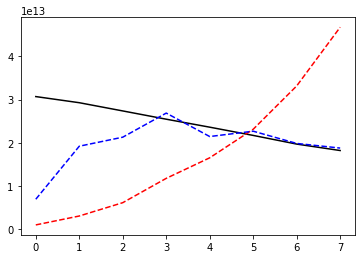

In [65]:
t = 1500
for i in range(10):
    DV_ref = []
    PV_ref = []
    for j in range(9):
        DV_ref.append(funct_int(qe_array_ori[j],t)/inte_sens[j])
        if j !=8:
            PV_ref.append(GT(t,wl[j]))
    DV_ref = np.array(DV_ref)
    DV_CT_cor = CT_cor @ np.array(DV_ref)

    plt.clf()

    plt.plot(PV_ref,color="k")

    plt.plot(DV_ref[:8]*fac_a_o+fac_b_o,"--",color="r")

    plt.plot(DV_CT_cor*fac_a+fac_b,"--",color="b")

    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/High-PV_compare"+str(t)+".jpg", dpi=800,bbox_inches='tight')

    t = t +500

In [75]:
WL2 = ["0.548","0.585","0.625","0.663","0.706","0.744","0.785","0.824","1000"]
DF_QE2 = pd.read_excel(camera_folder+"qe_cor.xlsx")
CT_cor = np.transpose(np.array(pd.read_excel(camera_folder+"CT_cor.xlsx")))
DF_mean = pd.read_csv(homefolder + "/11_MusTAM_Analyse\Result_calibration/mean_value_15.csv")
integra_factor = np.asarray(DF_mean.integre_factor)
temp = np.asarray(DF_mean.temp)
noise = np.asarray(DF_mean.noise)
fac_a = []
PV_matrx = []
for j in range(len(wl)):
    DV_array = []
    PV_array = []
    for i in range(len(temp)):
        DV = DF_mean[DF_mean.noise==noise[i]]
        DV_mean = []
        for k in WL2:
            DV_mean.append(np.array((np.asarray(DV[k])-noise[i])/integra_factor[i])[0])
        DV_mean = CT_cor @ np.array(DV_mean)
        DV_array.append(DV_mean)
        PV_array.append(GT(temp[i],wl[j]))
    DV_array = np.array(DV_array)
    PV_array = np.array(PV_array)
    PV_matrx.append(PV_array)
    popt,cov = curve_fit(cali_curvefit2,DV_array[:,j],PV_array)
    fac_a.append(popt[0])
PV_matrx = np.array(PV_matrx)
print(fac_a)

[13158.704419696605, 32313.82381373593, 64566.50629320141, 112503.51019005575, 116285.96866317325, 128453.782107051, 178583.06906017265, 157371.19720705043]


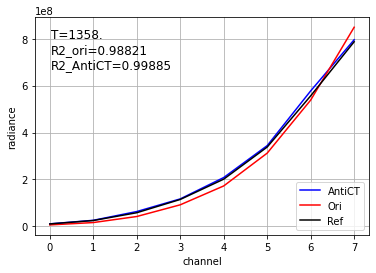

In [101]:
r2_ch_ACT = []
r2_ch_ori = []
for i in range(8):
    plt.clf()
    result_ACT = DV_array[:,i]*fac_a[i]
    result_ori = DV_matrix_o[i,:]*fac_a_o[i]+fac_b_o[i]
    plt.plot(DV_array[:,i]*fac_a[i],color="b",label="AntiCT")
    plt.plot(DV_matrix_o[i,:]*fac_a_o[i]+fac_b_o[i],color="r",label="Ori")
    plt.plot(PV_matrx[i,:],color="k",label="Ref")
    r2_ACT = r2_score(PV_matrx[i,:],result_ACT)
    r2_ori = r2_score(PV_matrx[i,:],result_ori)
    r2_ch_ACT.append(r2_ACT)
    r2_ch_ori.append(r2_ori)
    plt.xticks(range(len(temp)), list(map(int, temp)),fontsize=8)
    plt.grid()
    plt.legend(loc="lower right")
    plt.ylabel("radiance")
    plt.xlabel("T/K")
    plt.text(0.05, 0.95, "Ch="+str(i+1)+"\nR2_ori="+str(r2_ori)[:7]+"\nR2_ACT="+str(r2_ACT)[:7], fontsize=12, color='k', transform=plt.gca().transAxes, ha='left', va='top')
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/cali_T-wise_ch"+str(i+1)+".png", dpi=800,bbox_inches='tight')

r2_T_ACT = []
r2_T_ori = []
for i in range(len(DV_array)):
    plt.clf()
    result_ACT = DV_array[i,:]*fac_a
    result_ori = DV_matrix_o[:,i]*fac_a_o+fac_b_o
    plt.plot(DV_array[i,:]*fac_a,color="b",label="AntiCT")
    plt.plot(DV_matrix_o[:,i]*fac_a_o+fac_b_o,color="r",label="Ori")
    plt.plot(PV_matrx[:,i],color="k",label="Ref")
    r2_ACT = r2_score(PV_matrx[:,i],result_ACT)
    r2_ori = r2_score(PV_matrx[:,i],result_ori)
    r2_ch_ACT.append(r2_ACT)
    r2_ch_ori.append(r2_ori)
    plt.legend(loc="lower right")
    plt.grid()
    plt.ylabel("radiance")
    plt.xlabel("channel")
    plt.text(0.05, 0.95, "T="+str(temp[i])[:5]+"\nR2_ori="+str(r2_ori)[:7]+"\nR2_AntiCT="+str(r2_ACT)[:7], fontsize=12, color='k',transform=plt.gca().transAxes, ha='left', va='top')
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/cali_ch-wise_T"+str(temp[i])+"_case"+str(i+1)+".png", dpi=800,bbox_inches='tight')

C:\Users\ge83viz\AppData\Local\Temp\ipykernel_28192\1447442625.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  funct0 = quad(integr, wl0, wl1, args=(tr_array, qe, t))[0]
C:\Users\ge83viz\AppData\Local\Temp\ipykernel_28192\1447442625.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up 

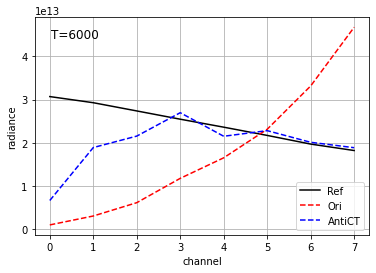

In [92]:
t = 1500
for i in range(10):
    DV_ref = []
    PV_ref = []
    for j in range(9):
        DV_ref.append(funct_int(qe_array_ori[j],t)/inte_sens[j])
        if j !=8:
            PV_ref.append(GT(t,wl[j]))
    DV_ref = np.array(DV_ref)
    DV_CT_cor = CT_cor @ np.array(DV_ref)

    plt.clf()

    plt.plot(PV_ref,color="k",label="Ref")

    plt.plot(DV_ref[:8]*fac_a_o+fac_b_o,"--",color="r",label="Ori")

    plt.plot(DV_CT_cor*fac_a,"--",color="b",label="AntiCT")
    plt.grid()
    plt.ylabel("radiance")
    plt.xlabel("channel")
    plt.legend(loc="lower right")
    plt.text(0.05, 0.95, "T="+str(t), fontsize=12, color='k', transform=plt.gca().transAxes, ha='left', va='top')
    plt.savefig("H:/1_Forschung/12_Program_p\MSI_preprocessing\Crosstalk/High-PV_compare"+str(t)+".jpg", dpi=800,bbox_inches='tight')

    t = t +500